In [1]:
import pandas as pd

red_wine = pd.read_csv("data/red-wine.csv")

In [2]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape

(1599, 12)

In [4]:
input_shape = [red_wine.drop(columns=['quality']).shape[1]]
input_shape

[11]

In [5]:
red_wine.shape

(1599, 12)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=input_shape)
])

2022-11-18 18:19:24.649265: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.04696357],
       [ 0.6017161 ],
       [ 0.0667429 ],
       [-0.07013977],
       [ 0.29859656],
       [-0.70477974],
       [-0.5865176 ],
       [ 0.33216304],
       [-0.70677483],
       [ 0.4211058 ],
       [ 0.4072488 ]], dtype=float32)>

In [8]:
type(model.weights[0])

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [9]:
w, b = model.get_weights()[0], model.get_weights()[1]
print(f"w: {w}, b: {b}")

w: [[-0.04696357]
 [ 0.6017161 ]
 [ 0.0667429 ]
 [-0.07013977]
 [ 0.29859656]
 [-0.70477974]
 [-0.5865176 ]
 [ 0.33216304]
 [-0.70677483]
 [ 0.4211058 ]
 [ 0.4072488 ]], b: [0.]


In [10]:
train_data = red_wine.sample(frac=0.7, random_state=0)
val_data   = red_wine.drop(index=train_data.index)
print(f"red_wine: {red_wine.shape}, train_data: {train_data.shape}, val_data: {val_data.shape}")

red_wine: (1599, 12), train_data: (1119, 12), val_data: (480, 12)


In [11]:
# scale data to (0, 1)
min_ = train_data.min()
max_ = train_data.max()
train_data = (train_data - min_) / (max_ - min_)
val_data   = (val_data   - min_) / (max_ - min_)

In [12]:
X_train = train_data.drop(columns=['quality'])
Y_train = train_data['quality']
X_val   = val_data.drop(columns=['quality'])
Y_val   = val_data['quality']

<AxesSubplot:>

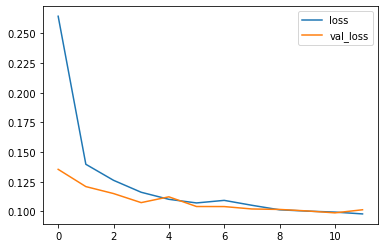

In [21]:
from tensorflow.keras import callbacks, layers

early_stopping = callbacks.EarlyStopping(
    min_delta=0.01,
    patience=8,
    restore_best_weights=True
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)    
])

model.compile(
    optimizer='adam',
    loss='mae',    
)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()